In [5]:
# Imports for queries
from astroquery.vizier import Vizier
from astroquery.simbad import Simbad
import astropy.units as u
import observation_planning as op
from astropy.coordinates import SkyCoord, Angle

# Imports for astroplan plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from astroplan import Observer, FixedTarget
from astropy.time import Time
from datetime import timezone  # Importing timezone
from astropy.coordinates import EarthLocation, AltAz, SkyCoord
from astropy import units as u


In [9]:
import astroquery
print(astroquery.__version__)

import astropy
print(astropy.__version__)

import astroplan
print(astroplan.__version__)

import pandas
print(pandas.__version__)

0.4.7
6.1.4
0.10.1
2.2.3


# Display RA & Dec of Science Target

In [7]:
identifier = "HD15745"

ra, dec = op.query_simbad(identifier)
ra = ra * u.hourangle
dec = dec * u.deg

RA: 02 32 55.8109, Dec: +37 20 01.040


# Query Heiles (2000) for Unpolarized Standards

In [4]:
ra_range = 0.5 * u.hourangle
dec_range = 5 * u.deg
columns_to_display = ["HD", "RA (J2000)", "Dec (J2000)", "HD", "Vmag", "Pol", "e_Pol", "WDSC"]

heiles_filename = "heiles_2000_wdsc_catalog.csv"

result = op.query_csv(heiles_filename, ra_range = (ra - ra_range, ra + ra_range), 
    dec_range = (dec - dec_range, dec + dec_range), columns = columns_to_display,
    brightness_range = (4, 8), 
    max_pol = 0.1, sort_by = "Pol", ascending = True)

print("Number of sources found: ", len(result))
print(result)

Number of sources found:  6
           HD RA (J2000)   Dec (J2000)       HD  Vmag   Pol  e_Pol WDSC
7284  16968.0    2:44:11     +35:06:54  16968.0   7.2  0.00   0.20   No
7703  14622.0    2:22:50   +41:23:47.4  14622.0   5.9  0.00   0.20   No
7220  14055.0    2:17:19  +33:50:50.28  14055.0   4.0  0.03   0.12   No
7239  13974.0    2:17:02  +34:13:29.28  13974.0   4.9  0.03   0.12   No
7508  17584.0    2:50:35  +38:19:08.04  17584.0   4.2  0.05   0.12   No
7598  18411.0    2:58:46  +39:39:46.08  18411.0   4.7  0.05   0.12   No


# Query Whittet (1992) for Polarized Standards

In [10]:
ra_range = 1 * u.hourangle
dec_range = 10 * u.deg
columns_to_display = ["Star", "RA (J2000)", "Dec (J2000)", "J", "P% (J)", 
                    "P% error (J)", "PA (J)", "WDSC"]

heiles_filename = "whittet_1992_wdsc_catalog.csv"

result = op.query_csv(heiles_filename, ra_range = (ra - ra_range, ra + ra_range), 
    dec_range = (dec - dec_range, dec + dec_range), columns = columns_to_display)

print(result)

             Star    RA (J2000)    Dec (J2000)  J  P% (J)  P% error (J)  \
0  NGC 1333 No. 3  3 29 10.4889  31 21 51.2274  -    2.40          0.07   
1  NGC 1333 No. 5  3 29 20.7342  31 18 20.6383  -    6.81          0.02   

   PA (J) WDSC  
0     111   No  
1     142   No  


# Calculate Input AOLP to SCExAO VAMPIRES

In [11]:

# Location of Mauna Kea
location = EarthLocation(lat=19.8262*u.deg, lon=-155.471*u.deg, height=4205*u.m)

# Date and time of observation in UTC
observation_time = Time('2024-08-26 15:00:00')  # 5 AM local time corresponds to 15:00 UTC

# RA and Dec of the target
ra = '03h29m20.7342s'
dec = '+31d18m20.6383s'
target = SkyCoord(ra=ra, dec=dec)

# Calculate Altitude and Azimuth
altaz_frame = AltAz(obstime=observation_time, location=location)
altaz = target.transform_to(altaz_frame)

# Parallactic angle calculation
parallactic_angle = altaz.az.rad * u.rad.to(u.deg)

altitude = altaz.alt.deg

print(f"Altitude: {altitude:.2f} degrees")
print(f"Parallactic Angle: {parallactic_angle:.2f} degrees")


Altitude: 76.46 degrees
Parallactic Angle: 29.81 degrees


In [12]:
# Calculate input polarization angle for NGC 1333 No. 5

ngc1333_no_5_input_aolp = op.calculate_input_aolp(111, parallactic_angle, altitude)
print("NGC1333 No. 5 Input AOLP to SCExAO VAMPIRES: ", ngc1333_no_5_input_aolp)

NGC1333 No. 5 Input AOLP to SCExAO VAMPIRES:  142.73231373303517


# Plot Target and Standards with Astroplan

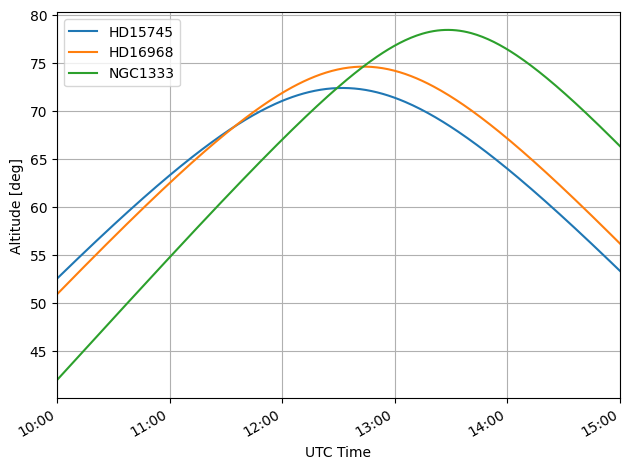

In [13]:
keck = Observer.at_site("Keck")
# Example science target with polarized and unpolarized standard

science_target = "HD15745"
unpol_standard = "HD16968"
pol_standard = "NGC1333"

# List of targets
targets = [science_target, unpol_standard, pol_standard]

# Start and end observation times in UTC
start_time = "2023-09-27 10:00:00" 
end_time = "2023-09-27 15:00:00" 

# Plot the airmass curves
op.plot_altitude_for_targets(keck.location, targets, start_time, end_time,
    filename = science_target + "_" + unpol_standard  + "_" + pol_standard + \
    "_altitude_plot")